
# Business Cases with Data Science 

## Case 3: Prediction of Bookings Cancellation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Pedro Santos (M20190420)
2. Ana Claudia Alferes (M20190932)
3. Lennart Dangers (M20190251)
4. Michael Machatschek (M20190054)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

This jupypter-notebook provides the code in python to do a customer segmentation of a given dataset. A more detailed description of this project and the solutions can be found in the report. 

# Step 1: Business Understanding

Please consult our report for further details. 

# Step 2: Data Understanding

## Dataset Description

A data dictionary is available in the appendix of our report.
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
import plotly.offline as po 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [51]:
df = pd.read_csv("data.csv")

In [52]:
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient  76.5                         0   
2         NULL                 0    Transient  68.0                         0   
3         NULL                 0    Transient  76.5                         0   
4         NULL                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [53]:
df.columns.values

array(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType',
       'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'ReservationStatusDate'], dtype=object)

In [54]:
non_numerical_var = ["Agent", "ArrivalDateMonth",
                    "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth","ArrivalDateYear","AssignedRoomType",
                     "Company", "Country", "CustomerType","DepositType",
                     "DistributionChannel", "IsCanceled", "IsRepeatedGuest", "MarketSegment",
                     "Meal", "RequiredCarParkingSpaces", "ReservationStatus",
                     "ReservationStatusDate", "ReservedRoomType"]
numerical_var = list(set(df.columns.values) - set(non_numerical_var))

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     79330 non-null int64
LeadTime                       79330 non-null int64
ArrivalDateYear                79330 non-null int64
ArrivalDateMonth               79330 non-null object
ArrivalDateWeekNumber          79330 non-null int64
ArrivalDateDayOfMonth          79330 non-null int64
StaysInWeekendNights           79330 non-null int64
StaysInWeekNights              79330 non-null int64
Adults                         79330 non-null int64
Children                       79326 non-null float64
Babies                         79330 non-null int64
Meal                           79330 non-null object
Country                        79306 non-null object
MarketSegment                  79330 non-null object
DistributionChannel            79330 non-null object
IsRepeatedGuest                79330 non-null int64
PreviousCancellations          79330 non-null int64


In [56]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [57]:
for col in non_numerical_var:
    print("--------------------" + col + "--------------------")
    print(df[col].value_counts())
    print("\n")

--------------------Agent--------------------
          9    31955
       NULL     8131
          1     7137
         14     3640
          7     3539
          6     2683
         28     1666
          3     1308
          8     1236
         37     1230
         19     1061
         21      875
        229      786
         83      696
         29      679
         12      578
         85      554
         20      540
         30      484
         27      450
         22      382
         56      375
         86      338
         58      335
        119      304
         26      295
         34      293
         44      292
         11      290
        138      287
               ...  
        216        1
        427        1
        476        1
        256        1
        242        1
        397        1
        267        1
        280        1
        247        1
        306        1
        303        1
        388        1
        444        1
        416        1
        2

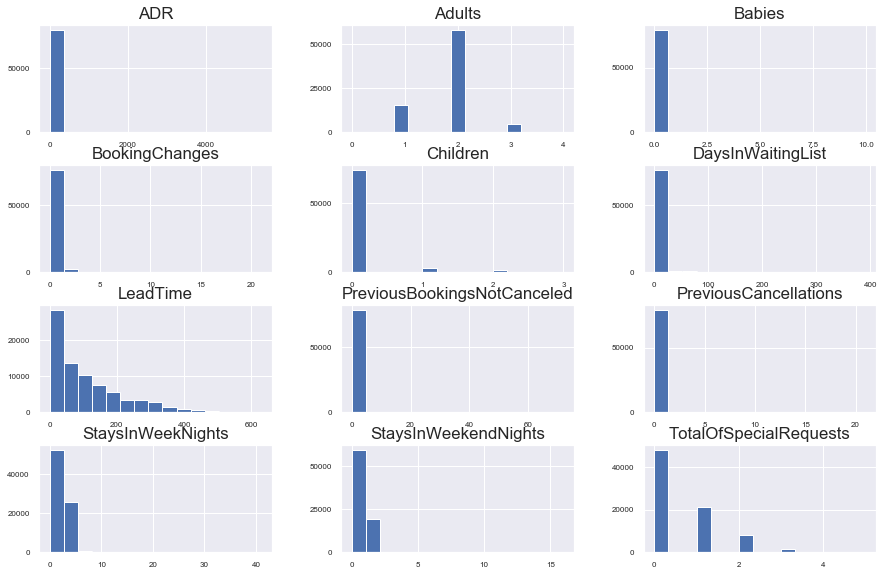

In [58]:
# Do histograms on all numeric variables
df[numerical_var].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

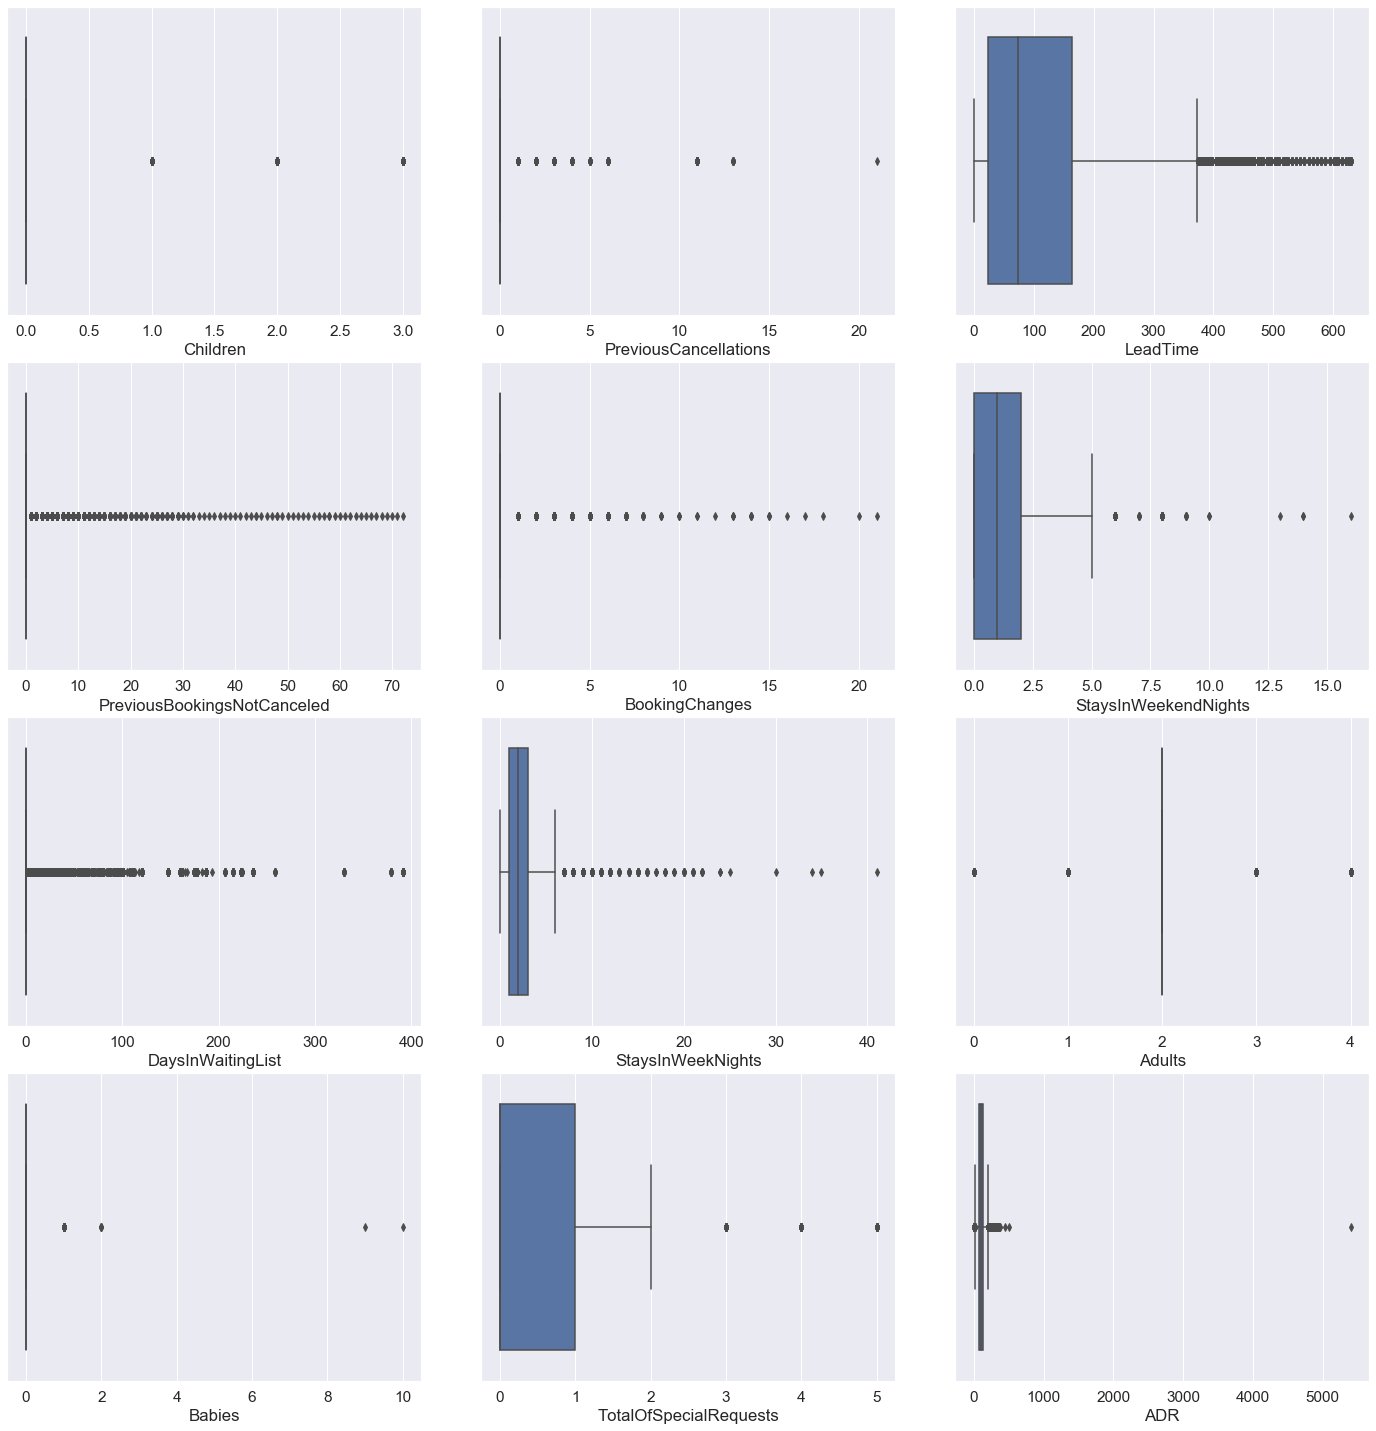

In [59]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

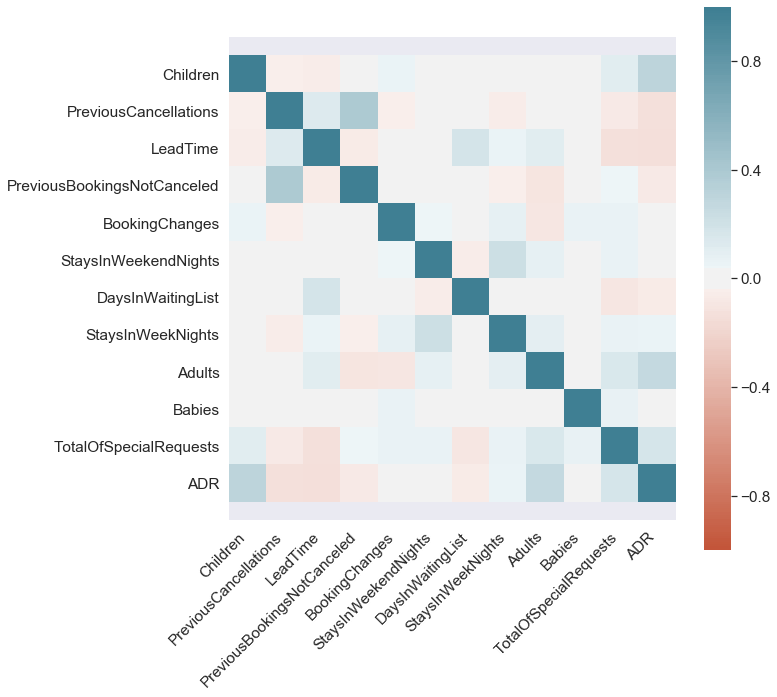

In [60]:
corr = df[numerical_var].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [61]:
can = df[df.IsCanceled == 1].IsCanceled.count()
Ncan = df[df.IsCanceled == 0].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=600, width=800, title_text="Canceled vs. Not Canceled")
fig.show()

In [161]:
can = df[df.IsCanceled == 1][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateYear", right_on="ArrivalDateYear" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Year", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateMonth", right_on="ArrivalDateMonth" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Month", plot_bgcolor="white")
fig.show() 

In [64]:
can = df[df.IsCanceled == 1][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Agent", right_on="Agent" ).head() 
print(pf_group)

x=[1,2,3,4,5]

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

         Agent  IsCanceled_x  IsCanceled_y
0            9         13262         18693
1            1          5230          1907
2         NULL          2609          5522
3            6           966          1717
4           19           780           281


In [65]:
can = df[df.IsCanceled == 1][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ReservedRoomType", right_on="ReservedRoomType" ).head() 

x=pf_group.ReservedRoomType.values

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

In [66]:
R = df[df.ReservedRoomType == df.AssignedRoomType].IsCanceled.count()
W = df[df.ReservedRoomType != df.AssignedRoomType].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Right Assigned Room','Wrong Assigned Room'], values=[R, W]))
fig.update_layout(height=600, width=800, title_text="Assigned Room Type")
fig.show()

In [67]:
df['FamilySize'] = df['Adults'] + df['Children'] + df['Babies']
df_F = df[df.FamilySize != 0]

can = df_F[df_F.IsCanceled == 1][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df_F[df_F.IsCanceled == 0][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "FamilySize", right_on="FamilySize" ) 
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Family Size", plot_bgcolor="white")
fig.show() 

In [82]:
can = df[(df.IsCanceled == 1) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsCanceled == 0) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=600, width=800, title_text="Booking with at least 1 Booking Change")
fig.show()

In [122]:
can = df[df.IsCanceled == 1][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Country", right_on="Country" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Country", plot_bgcolor="white")
fig.show() 

#Remember this one it's problematic since we just know the real country from the customer when the customer arrives

In [86]:
can = df[df.IsCanceled == 1][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "CustomerType", right_on="CustomerType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Customer Type", plot_bgcolor="white")
fig.show() 

In [123]:
can = df[df.IsCanceled == 1][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DepositType", right_on="DepositType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Deposit Type", plot_bgcolor="white")
fig.show() 

In [156]:
can = df[df.IsCanceled == 1][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DistributionChannel", right_on="DistributionChannel" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Distribution Channel", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "MarketSegment", right_on="MarketSegment" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [126]:
can = df[(df.IsRepeatedGuest == 1)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsRepeatedGuest == 0)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Repeat Customer','First Time Customer'], values=[can, Ncan]))
fig.update_layout(height=600, width=800, title_text="Check for repeat customers")
fig.show()

In [154]:
fig = go.Figure(data=[ 
    go.Histogram(x=df[df.IsCanceled == 1].LeadTime,nbinsx=50, name="Canceled"),
    go.Histogram(x=df[df.IsCanceled == 0].LeadTime,nbinsx=50, name="Not Canceled")])

fig.update_layout(title_text="Lead time in Canceled and Not Canceled Bookings")
fig.show() 

In [157]:
can = df[df.IsCanceled == 1][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "Meal", right_on="Meal" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [168]:
can = df[df.IsCanceled == 1].PreviousCancellations.sum()
Ncan = df[df.IsCanceled == 0].PreviousCancellations.sum()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=600, width=800, title_text="Previous Cancellations")
fig.show()

In [184]:
can = df[df.IsCanceled == 1] 
Ncan = df[df.IsCanceled == 0] 

fig = make_subplots(2,2, subplot_titles=["Canceled Weekend","Canceled Week"
                                        , "Not Canceled Weekend", "Not Canceled Week"])

fig.add_trace(go.Histogram(x=can.StaysInWeekendNights, name="Restaurant Day"),1,1)
fig.add_trace(go.Histogram(x=can.StaysInWeekNights, name="Delivery Day"),1,2)

fig.add_trace(go.Histogram(x=Ncan.StaysInWeekendNights, name="Restaurant Month"),2,1)
fig.add_trace(go.Histogram(x=Ncan.StaysInWeekNights, name="Delivery Month"),2,2)

fig.update_layout(title_text="Number of nights booked", plot_bgcolor="white", showlegend=False)

fig.show() 

In [185]:
can = df[df.IsCanceled == 1][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "TotalOfSpecialRequests", right_on="TotalOfSpecialRequests" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=500, width=1000, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

## Summary Data Understanding / Data Exploration


# Step 3: Data Preparation

In [69]:
X = df.copy(deep= True)

In [70]:
# Outlier handling

# Step 4: Modeling

# Step 5: Evaluation
